In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv


# Data Load

In [2]:
import pandas as pd

In [3]:
path = '/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv'
df = pd.read_csv(path, sep='\,')
df.head()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
# Installing the library
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: panel
    Found existing installation: panel 0.13.1
    Uninstalling panel-0.13.1:
      Successfully uninstalled panel-0.13.1
  Attempting uninstall: holoviews
    Found existing installation: holoviews 1.15.0
    Uninstalling holoviews-1.15.0:
      Successfully uninstalled holoviews-1.15.0


In [6]:
# Instantiate the library
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


Shape of your Data Set loaded: (62630, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    15 Predictors classified...
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 62630 exceeds maximum, randomly sampling 62630 rows for EDA...

###########

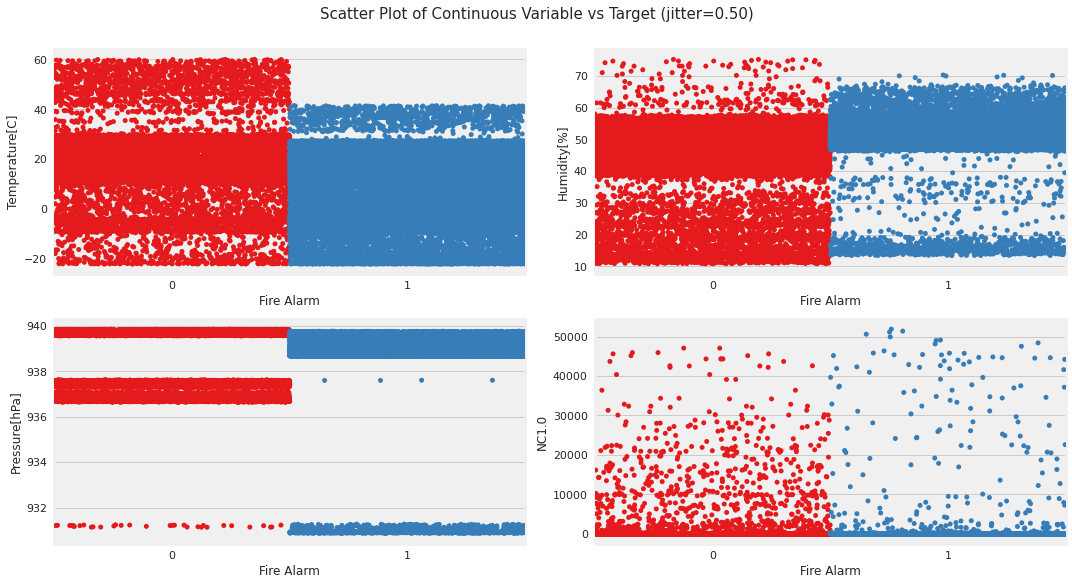

Total Number of Scatter Plots = 10


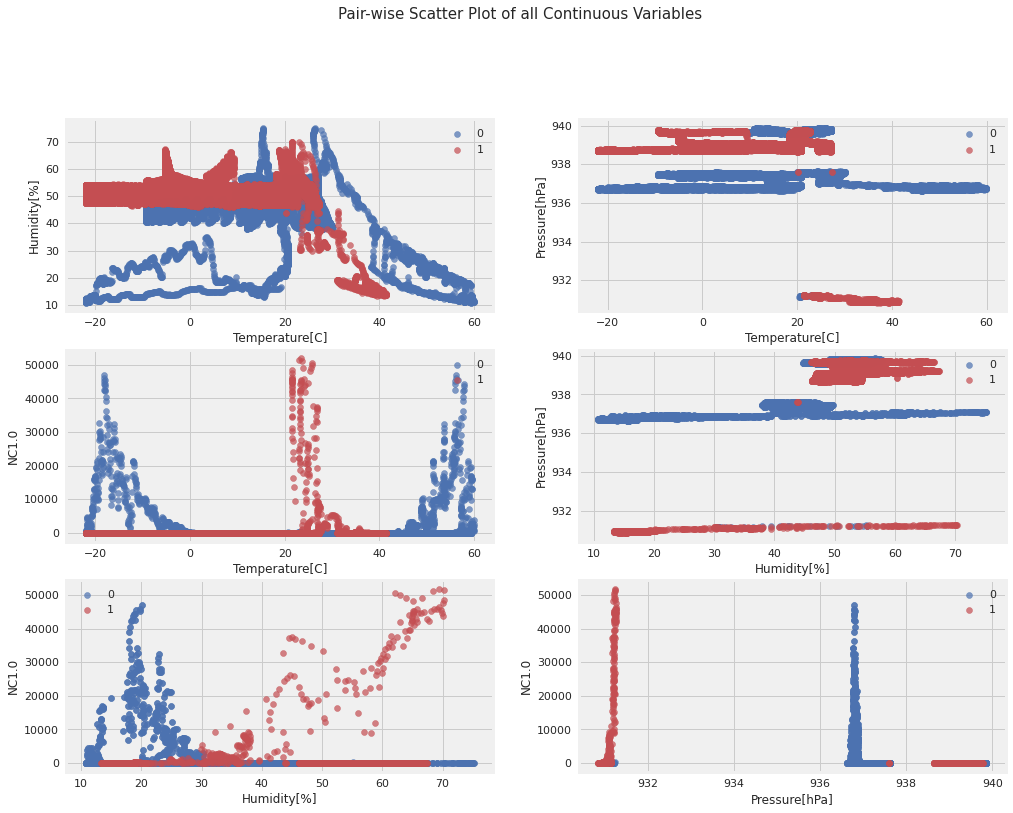

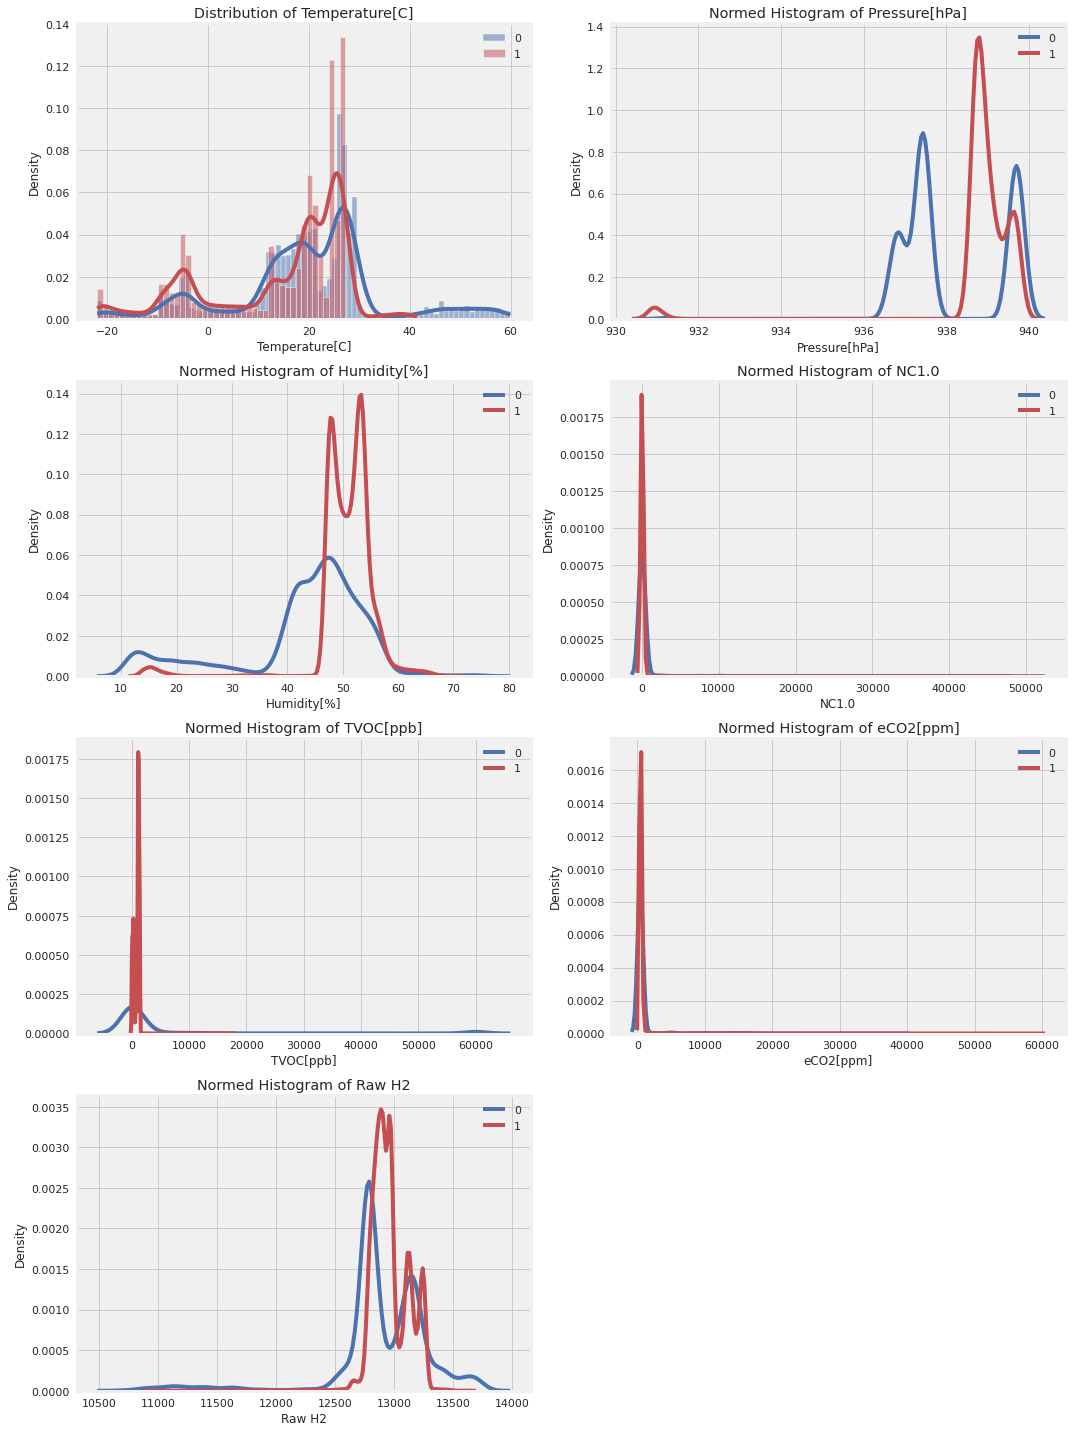

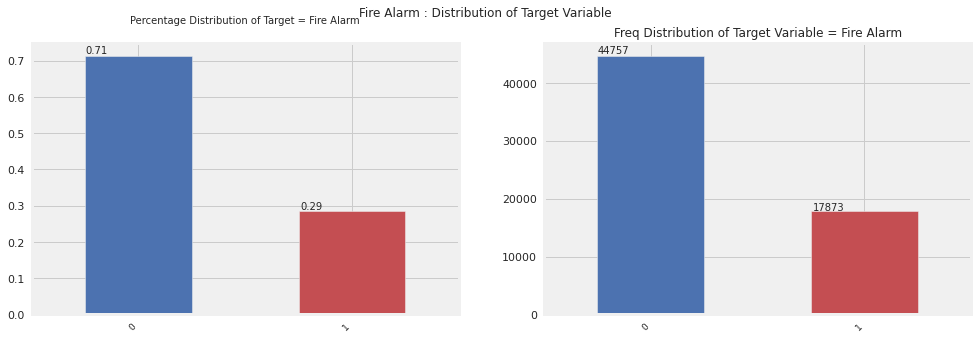

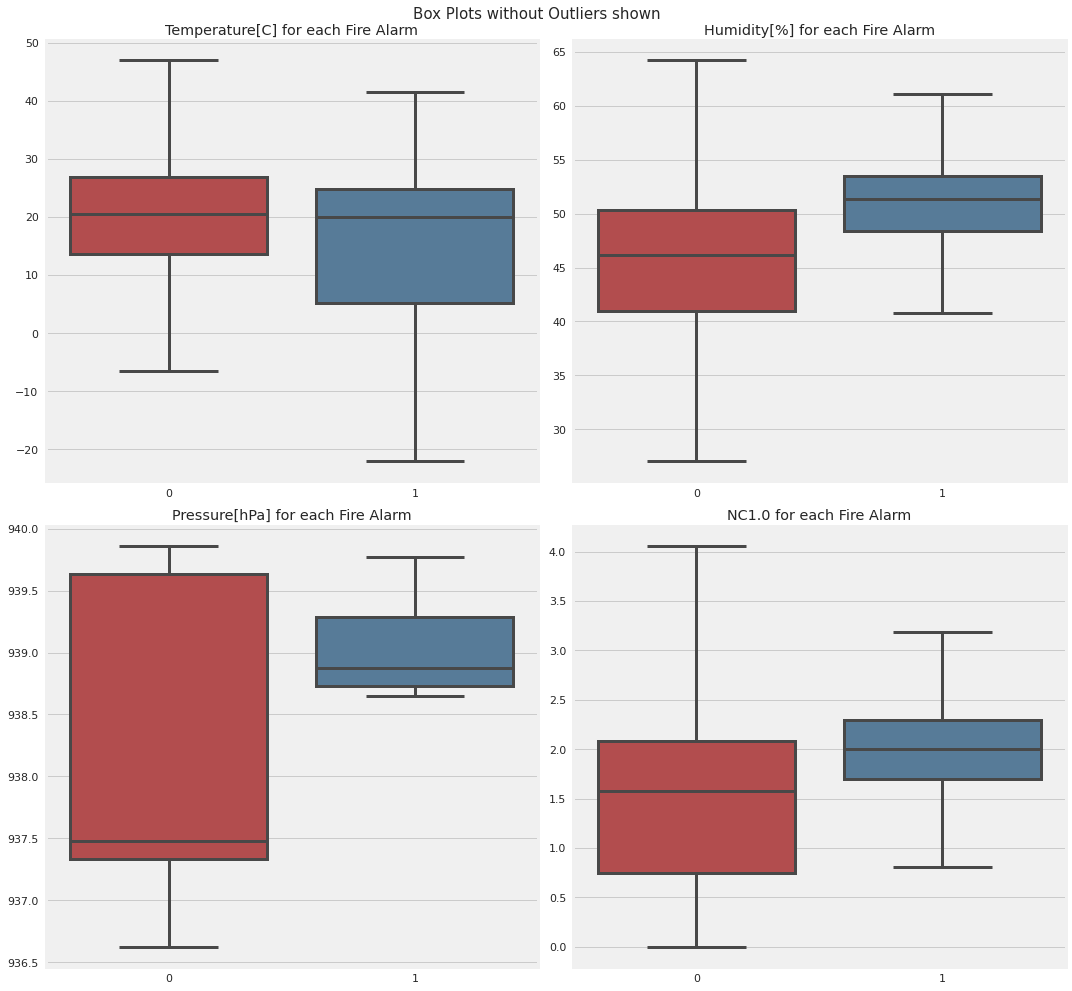

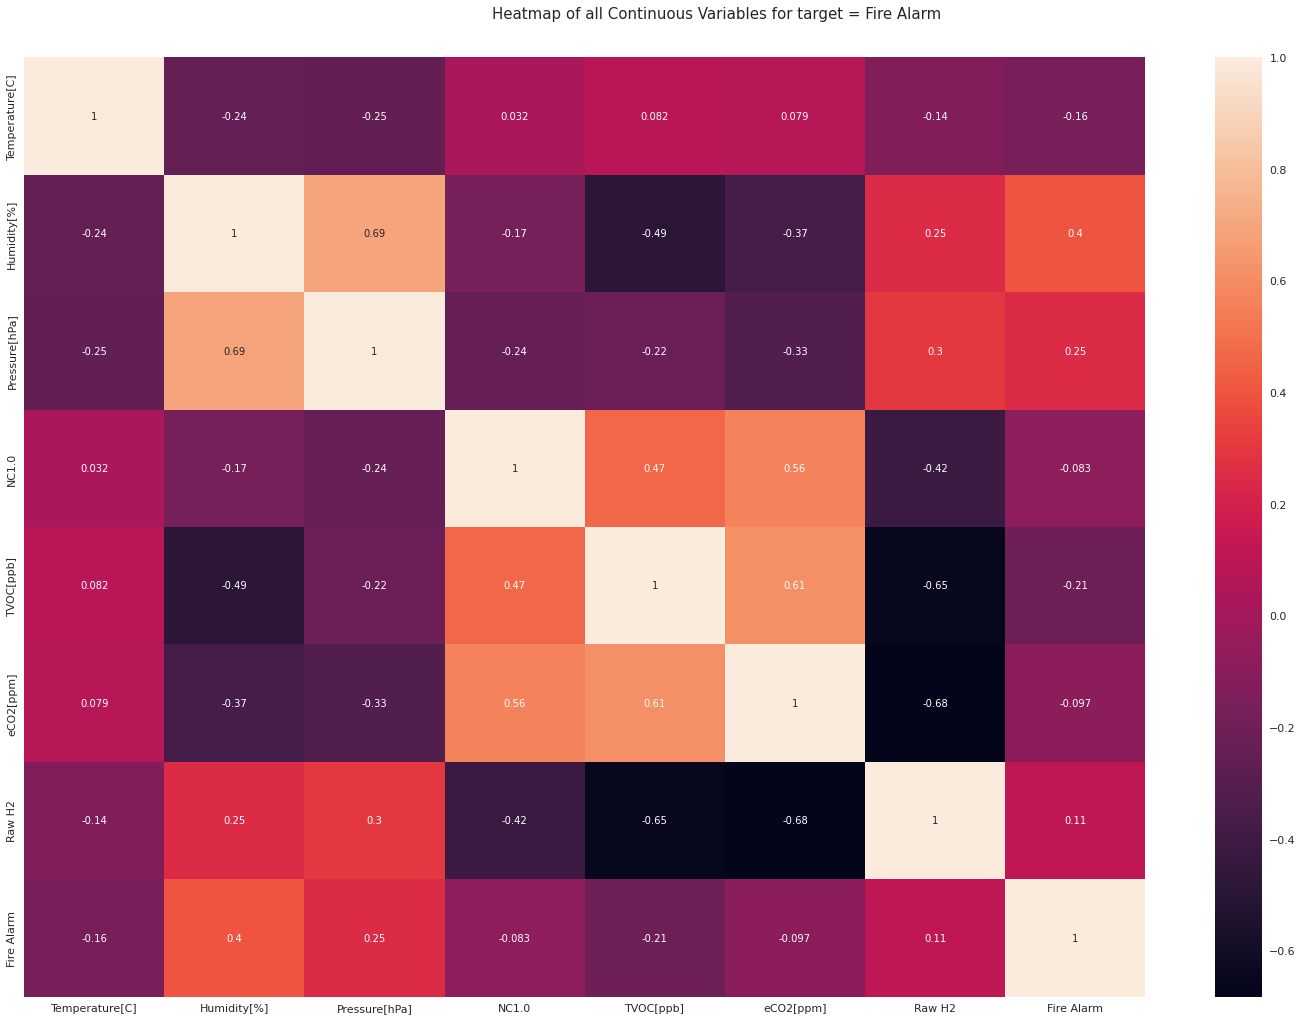

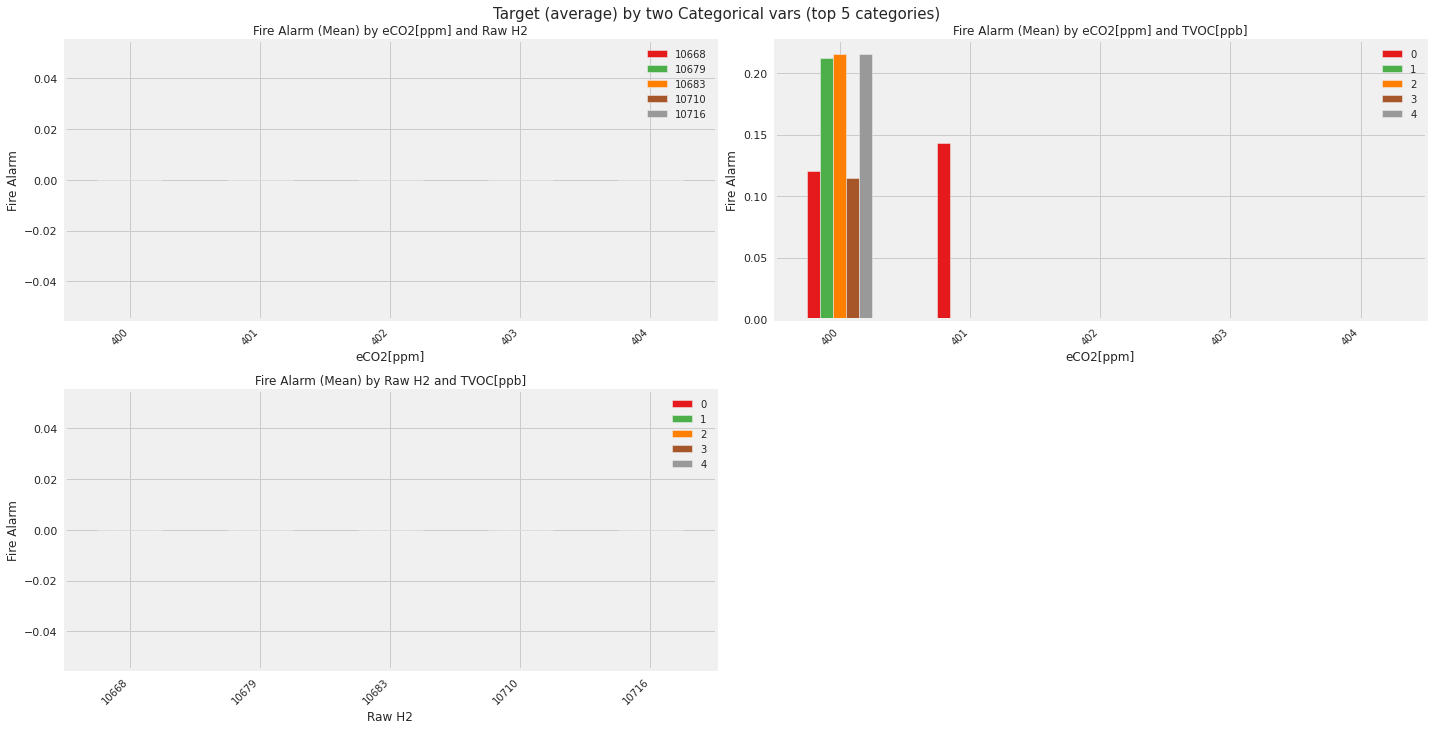

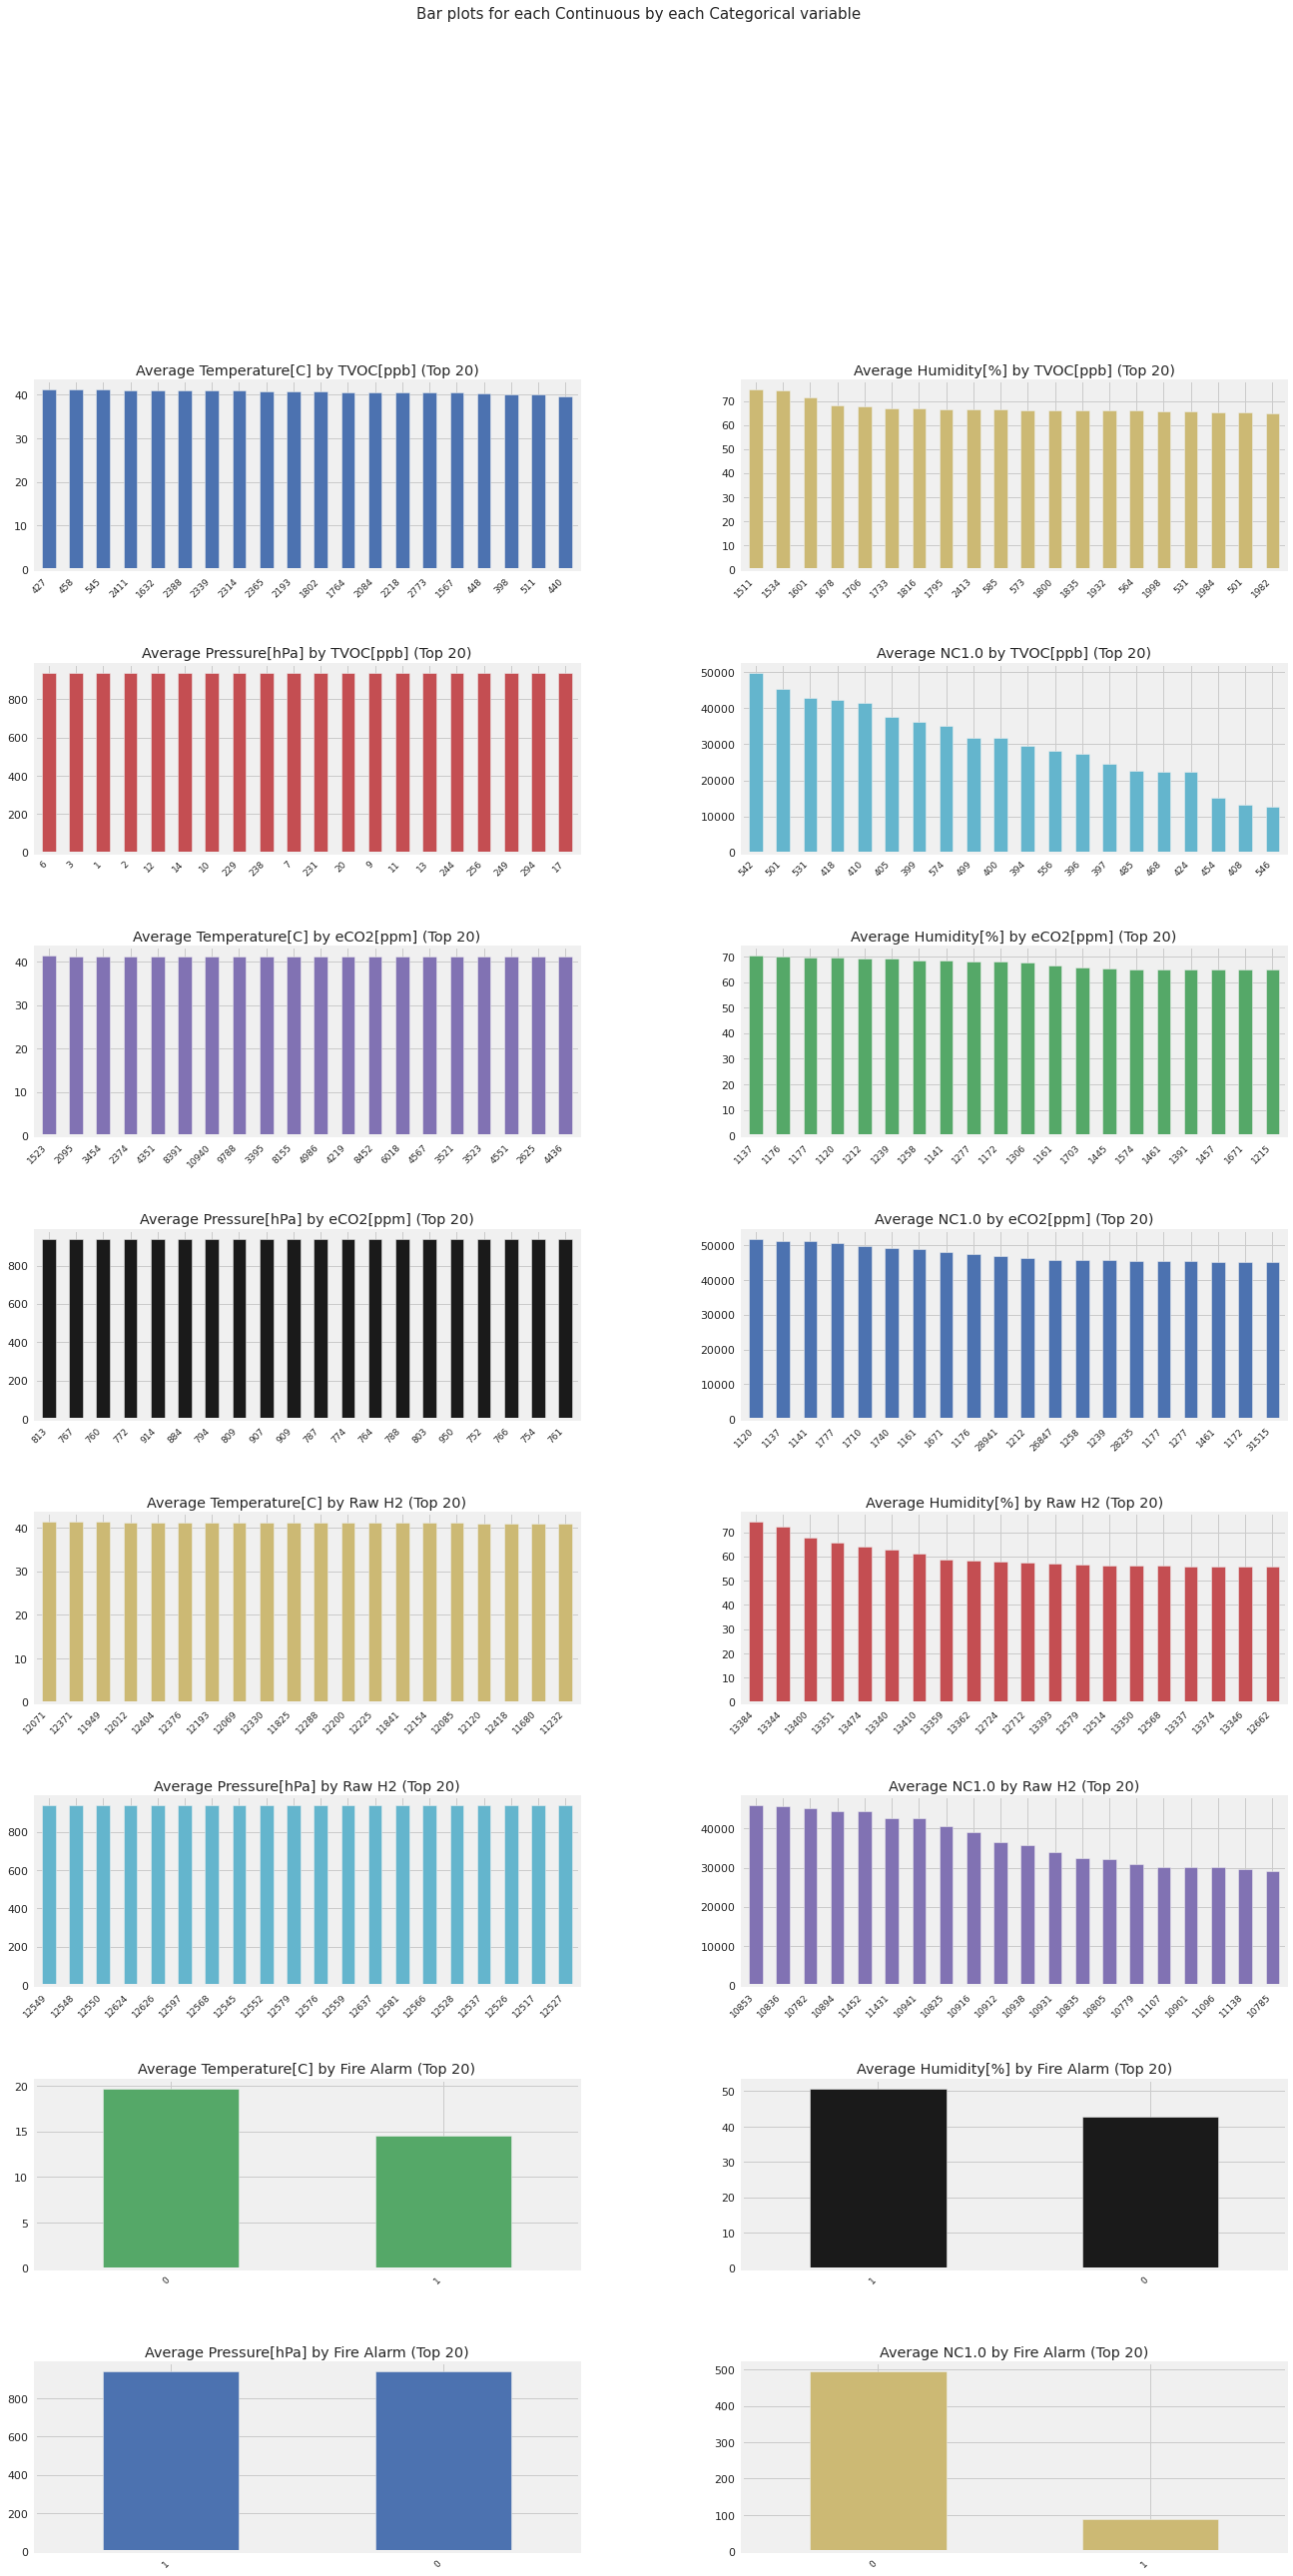

All Plots done
Time to run AutoViz = 22 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
dft = AV.AutoViz(None, sep='\,', depVar='Fire Alarm', dfte=df, header=0, verbose=0,
                            lowess=False, chart_format='svg',max_rows_analyzed=df.shape[0], max_cols_analyzed=7)

In [8]:
features_to_use = dft.columns.tolist()
print(features_to_use)

['Temperature[C]', 'Humidity[%]', 'Pressure[hPa]', 'NC1.0', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Fire Alarm']


In [9]:
X = df[features_to_use[:-2]]
y = df['Fire Alarm']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   Pressure[hPa]   62630 non-null  float64
 3   NC1.0           62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 2.9 MB


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std = StandardScaler()
X = std.fit_transform(X, y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [14]:
!pip install xgboost

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
ModelList = [KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), SVC(), MLPClassifier(), GaussianNB(), XGBClassifier()]
from time import time
from sklearn.metrics import accuracy_score

In [16]:
modelName = []
acc = []
time_exc = []

for i in ModelList:
    modelName.append(type(i).__name__)
    begin = time()
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    end = time()
    accScore = accuracy_score(pred,y_test)
    acc.append(accScore*100)
    time_exc.append(end-begin)

In [17]:
df_eval = pd.DataFrame(list(zip(modelName, acc, time_exc)),
               columns =['Model Name', 'Accuracy Score', 'Time Taken to Exc'])
df_eval

Model Name  Accuracy Score  Time Taken to Exc
0        KNeighborsClassifier       99.640747           0.770346
1      RandomForestClassifier       99.984033           4.742487
2          AdaBoostClassifier       99.840332           2.324806
3  GradientBoostingClassifier       99.928149           7.913642
4                         SVC       95.217947          25.591011
5               MLPClassifier       99.010059          50.002289
6                  GaussianNB       74.596839           0.024787
7               XGBClassifier      100.000000           1.797755